# **Predictive Modeling for Chronic Disease Risk Assessment**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **DATASET**

In [3]:
diabetes = pd.read_csv('Healthcare-Diabetes.csv')
diabetes.head(10)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


In [5]:
heart = pd.read_csv('heart.csv')
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# **DATA PRE PROCESSING**

In [6]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
heart.shape

(303, 14)

In [8]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
heart.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [11]:
diabetes.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [12]:
diabetes.shape

(2768, 10)

In [13]:
diabetes.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [15]:
diabetes.isnull().sum()

,0
Id,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# **EXPLORATORY DATA ANALYSIS**

In [16]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


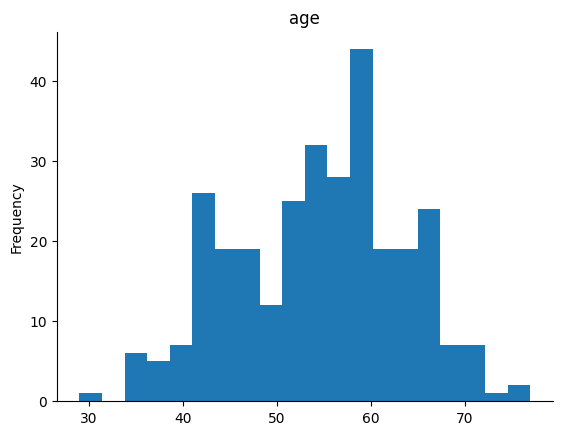

In [17]:
heart['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
X_heart = heart[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y_heart = heart['target']

# Check the shapes to confirm splitting
print("Heart Features Shape:", X_heart.shape)
print("Heart Target Shape:", y_heart.shape)

Heart Features Shape: (303, 13)
Heart Target Shape: (303,)


In [19]:
# Splitting features and target variable for Diabetes dataset
X_diabetes = diabetes[['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y_diabetes = diabetes['Outcome']

# Check the shapes to confirm splitting
print("Diabetes Features Shape:", X_diabetes.shape)
print("Diabetes Target Shape:", y_diabetes.shape)

Diabetes Features Shape: (2768, 9)
Diabetes Target Shape: (2768,)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [21]:
# Splitting datasets into train and test sets
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.3, random_state=42)
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.3, random_state=42)

In [22]:
# Standardizing the data (KNN works better with standardized data)
scaler = StandardScaler()
X_train_heart = scaler.fit_transform(X_train_heart)
X_test_heart = scaler.transform(X_test_heart)
X_train_diabetes = scaler.fit_transform(X_train_diabetes)
X_test_diabetes = scaler.transform(X_test_diabetes)

In [23]:
# Applying KNN classifier
knn_heart = KNeighborsClassifier(n_neighbors=5)
knn_diabetes = KNeighborsClassifier(n_neighbors=5)

In [24]:
# Training the model
knn_heart.fit(X_train_heart, y_train_heart)
knn_diabetes.fit(X_train_diabetes, y_train_diabetes)

KNeighborsClassifier()

In [25]:
# Making predictions
y_pred_heart = knn_heart.predict(X_test_heart)
y_pred_diabetes = knn_diabetes.predict(X_test_diabetes)

**EVALUATION MODEL**

In [26]:
print("Heart Disease Prediction:")
print("Accuracy:", accuracy_score(y_test_heart, y_pred_heart))
print("Confusion Matrix:\n", confusion_matrix(y_test_heart, y_pred_heart))
print("Classification Report:\n", classification_report(y_test_heart, y_pred_heart))

Heart Disease Prediction:
Accuracy: 0.8681318681318682
Confusion Matrix:
 [[35  6]
 [ 6 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [27]:
print("\nDiabetes Prediction:")
print("Accuracy:", accuracy_score(y_test_diabetes, y_pred_diabetes))
print("Confusion Matrix:\n", confusion_matrix(y_test_diabetes, y_pred_diabetes))
print("Classification Report:\n", classification_report(y_test_diabetes, y_pred_diabetes))


Diabetes Prediction:
Accuracy: 0.8170878459687124
Confusion Matrix:
 [[491  71]
 [ 81 188]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       562
           1       0.73      0.70      0.71       269

    accuracy                           0.82       831
   macro avg       0.79      0.79      0.79       831
weighted avg       0.82      0.82      0.82       831



**Interpretation**: The heart disease prediction model, with an accuracy of 86.81%, demonstrates a strong ability to correctly identify both heart disease and non-heart disease cases. The balanced precision, recall, and F1-scores across both classes suggest that the model is effective in distinguishing between patients with and without heart disease. The model's near-equal performance for both positive and negative predictions, as seen in the macro and weighted averages of 0.87, indicates a reliable tool for heart disease risk assessment. This performance can aid healthcare professionals in early diagnosis and treatment, potentially improving patient outcomes by providing accurate predictions based on historical medical data.

In contrast, the diabetes prediction model, with an accuracy of 81.71%, is slightly less effective, particularly in predicting diabetes cases (class 1). While it performs well in identifying non-diabetic patients (class 0) with an F1-score of 0.87, its performance drops when identifying diabetic patients, with a lower F1-score of 0.71. This suggests that the model may struggle with the more nuanced or less frequent characteristics of diabetic patients in the dataset. Although the model still provides valuable insights for diabetes risk prediction, improvements in handling imbalanced data or incorporating additional health indicators could enhance its predictive power, especially for diabetic patients, thereby supporting more targeted interventions in healthcare decision-making.

In [34]:
k_range = range(1, 26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_heart, y_train_heart)
    y_pred = knn.predict(X_test_heart)
    scores.append(accuracy_score(y_test_heart, y_pred))

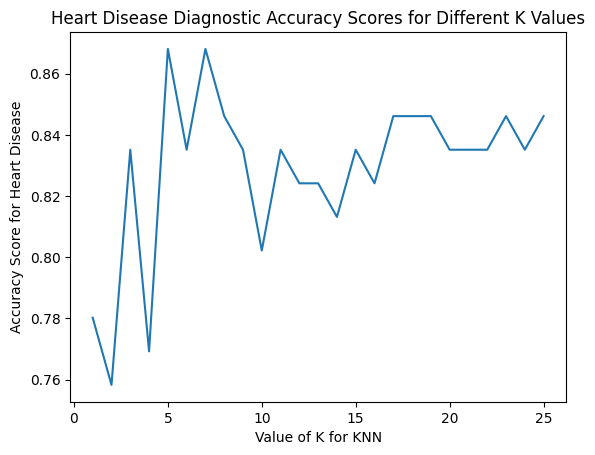

In [36]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score for Heart Disease')
plt.title('Heart Disease Diagnostic Accuracy Scores for Different K Values')
plt.show()

In [37]:
k_range = range(1, 26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_diabetes, y_train_diabetes)
    y_pred = knn.predict(X_test_diabetes)
    scores.append(accuracy_score(y_test_diabetes, y_pred))

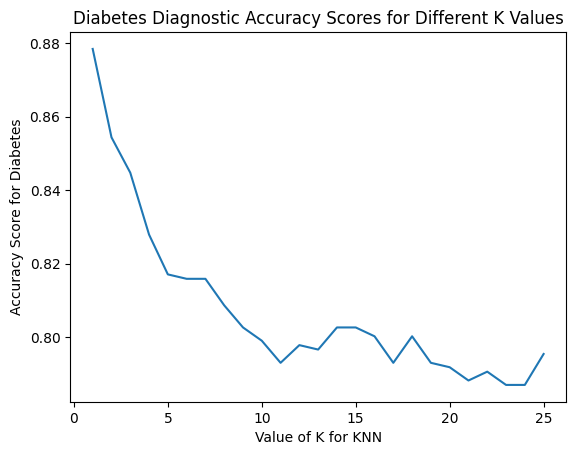

In [38]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score for Diabetes')
plt.title('Diabetes Diagnostic Accuracy Scores for Different K Values')
plt.show()

**HEART PREDICTION**

In [28]:
# Predicting probabilities
y_probs_heart = knn_heart.predict_proba(X_test_heart)

# Defining risk levels based on predicted probabilities
def classify_risk(proba):
    if proba[1] > 0.7:
        return 'High-risk'
    elif proba[1] > 0.4:
        return 'Medium-risk'
    else:
        return 'Low-risk'

# Applying risk classification
risk_levels = [classify_risk(p) for p in y_probs_heart]

# Creating a DataFrame to display risk levels
classification_df = pd.DataFrame({'Risk Level': risk_levels})
print(classification_df)

     Risk Level
0      Low-risk
1      Low-risk
2     High-risk
3      Low-risk
4     High-risk
..          ...
86     Low-risk
87  Medium-risk
88  Medium-risk
89  Medium-risk
90    High-risk

[91 rows x 1 columns]


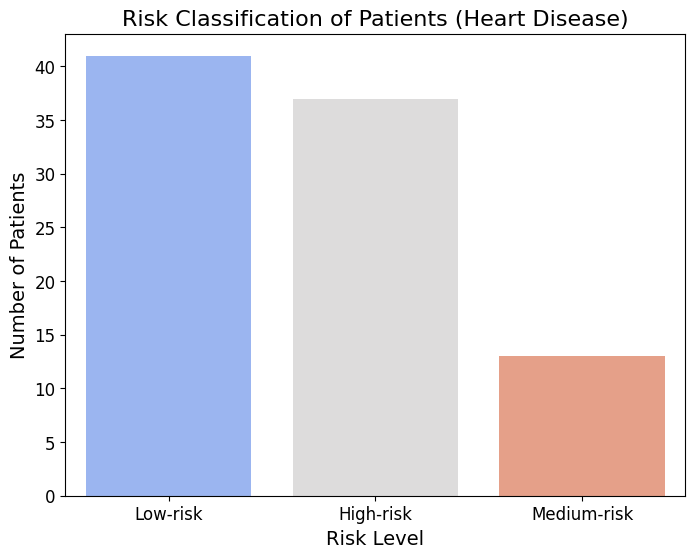

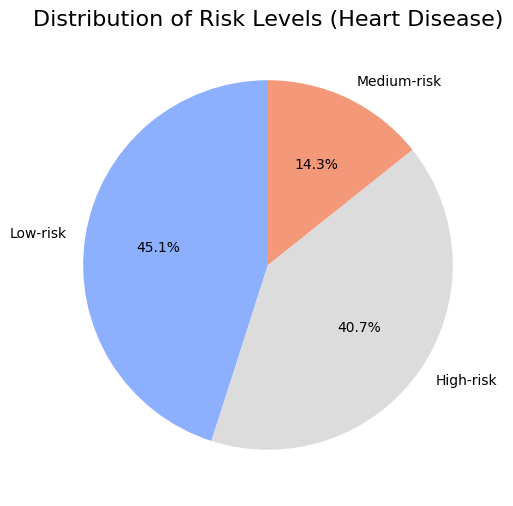

In [39]:
# Counting the number of patients in each risk level
risk_count = classification_df['Risk Level'].value_counts()

# Bar plot of risk classification
plt.figure(figsize=(8, 6))
sns.barplot(x=risk_count.index, y=risk_count.values, palette="coolwarm")
plt.title('Risk Classification of Patients (Heart Disease)', fontsize=16)
plt.xlabel('Risk Level', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Optionally, Pie chart of risk classification
plt.figure(figsize=(8, 6))
plt.pie(risk_count.values, labels=risk_count.index, autopct='%1.1f%%', colors=sns.color_palette("coolwarm", 3), startangle=90)
plt.title('Distribution of Risk Levels (Heart Disease)', fontsize=16)
plt.show()

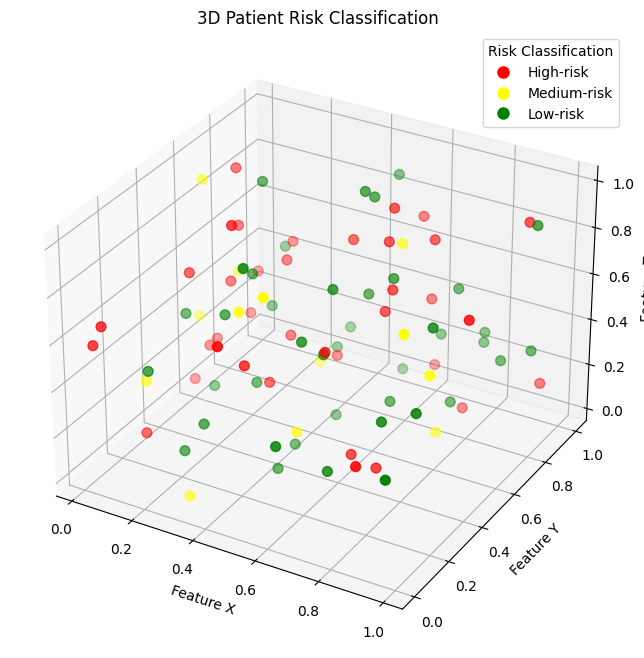

In [30]:
from mpl_toolkits.mplot3d import Axes3D

# Sample code to predict probabilities and classify risk levels
# Assuming you already have `y_probs_heart` and `risk_levels` as defined above

# Creating a DataFrame to display risk levels
classification_df = pd.DataFrame({'Risk Level': risk_levels})

# For 3D visualization, we'll create some synthetic features (X, Y, Z)
# Replace these with your actual features as needed
np.random.seed(0)
classification_df['X'] = np.random.rand(len(classification_df))
classification_df['Y'] = np.random.rand(len(classification_df))
classification_df['Z'] = np.random.rand(len(classification_df))

# Map risk levels to colors
colors = {'High-risk': 'red', 'Medium-risk': 'yellow', 'Low-risk': 'green'}
classification_df['Color'] = classification_df['Risk Level'].map(colors)

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(classification_df['X'], classification_df['Y'], classification_df['Z'],
           c=classification_df['Color'], s=50)

# Adding title and labels
ax.set_title('3D Patient Risk Classification')
ax.set_xlabel('Feature X')
ax.set_ylabel('Feature Y')
ax.set_zlabel('Feature Z')

# Adding a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors.values()]
ax.legend(handles, colors.keys(), title='Risk Classification')

# Show the plot
plt.show()

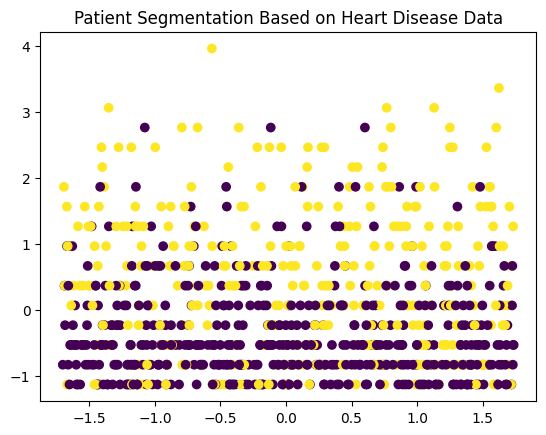

In [31]:
# Using KNN to group/segment patients based on health attributes
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Using KMeans for patient segmentation based on health data
kmeans = KMeans(n_clusters=2)  # Let's say we want 3 patient segments
kmeans.fit(X_test_diabetes)

# Predicting segments
segments = kmeans.predict(X_test_diabetes)

# Plotting the segments
plt.scatter(X_test_diabetes[:, 0], X_test_diabetes[:, 1], c=segments)
plt.title("Patient Segmentation Based on Heart Disease Data")
plt.show()


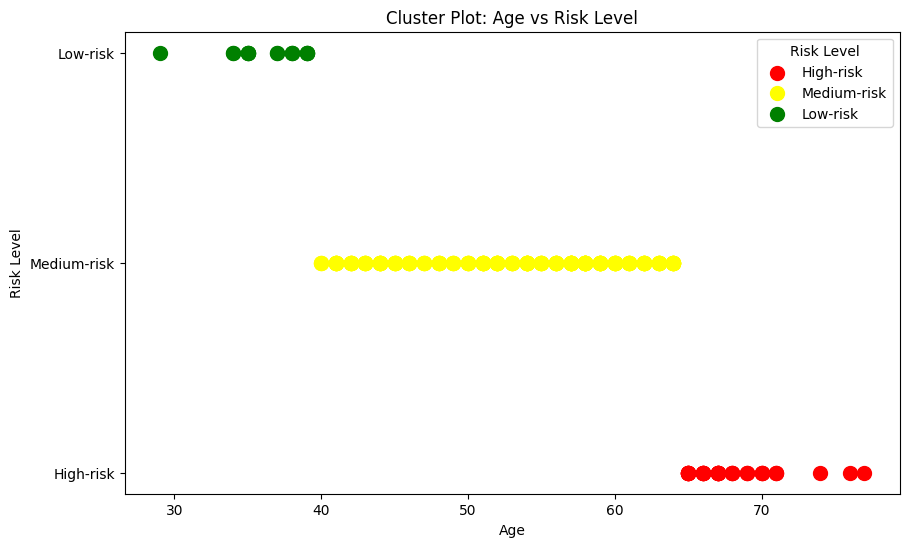

In [32]:
# Defining age groupings and their corresponding risk levels
def age_to_risk(age):
    if age >= 65:
        return 'High-risk'
    elif 40 <= age < 65:
        return 'Medium-risk'
    else:
        return 'Low-risk'

# Apply the classification function to the 'Age' column
heart['Risk Level'] = heart['age'].apply(age_to_risk)

# Assigning colors for each risk level
colors = {'High-risk': 'red', 'Medium-risk': 'yellow', 'Low-risk': 'green'}
heart['Color'] = heart['Risk Level'].map(colors)

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot of age vs risk level
for risk_level, color in colors.items():
    subset = heart[heart['Risk Level'] == risk_level]
    plt.scatter(subset['age'], [risk_level]*len(subset), color=color, label=risk_level, s=100)

# Adding title and labels
plt.title('Cluster Plot: Age vs Risk Level')
plt.xlabel('Age')
plt.ylabel('Risk Level')

# Adding a legend
plt.legend(title='Risk Level')

# Display the plot
plt.show()


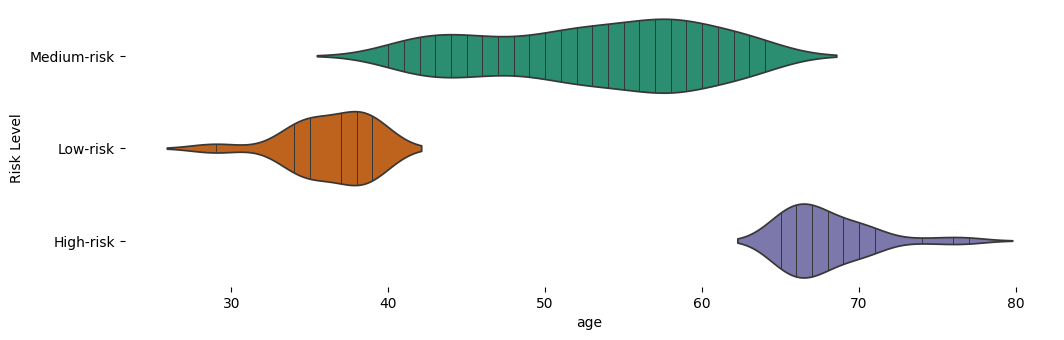

In [33]:
figsize = (12, 1.2 * len(heart['Risk Level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(heart, x='age', y='Risk Level', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# **DIABETES PREDICTION**

In [42]:
# Predicting probabilities
y_probs_diabetes = knn_diabetes.predict_proba(X_test_diabetes)

# Defining risk levels based on predicted probabilities
def classify_risk(proba):
    if proba[1] > 0.7:
        return 'High-risk'
    elif proba[1] > 0.4:
        return 'Medium-risk'
    else:
        return 'Low-risk'

# Applying risk classification
risk_levels = [classify_risk(p) for p in y_probs_diabetes]

# Creating a DataFrame to display risk levels
classification_diabetes = pd.DataFrame({'Risk Level': risk_levels})
classification_diabetes

,Risk Level
0,Low-risk
1,Medium-risk
2,High-risk
3,Low-risk
4,High-risk
...,...
826,High-risk
827,Low-risk
828,Medium-risk
829,Low-risk


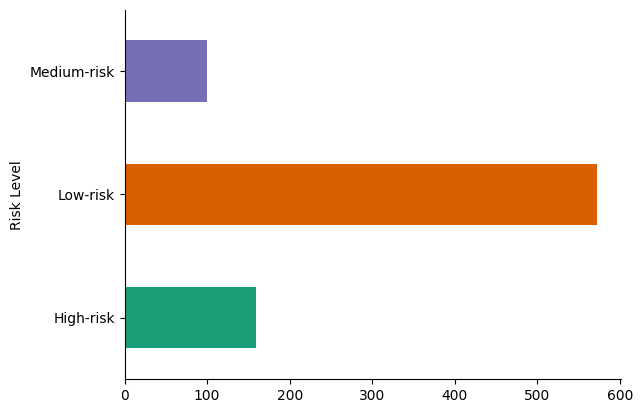

In [45]:
classification_diabetes.groupby('Risk Level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

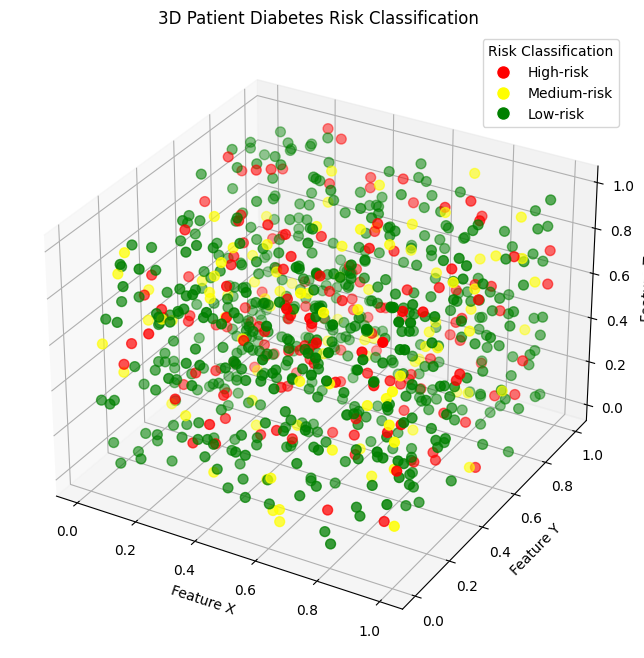

In [44]:
np.random.seed(0)
classification_diabetes['X'] = np.random.rand(len(classification_diabetes))
classification_diabetes['Y'] = np.random.rand(len(classification_diabetes))
classification_diabetes['Z'] = np.random.rand(len(classification_diabetes))

# Map risk levels to colors
colors = {'High-risk': 'red', 'Medium-risk': 'yellow', 'Low-risk': 'green'}
classification_diabetes['Color'] = classification_diabetes['Risk Level'].map(colors)

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(classification_diabetes['X'], classification_diabetes['Y'], classification_diabetes['Z'],
           c=classification_diabetes['Color'], s=50)

# Adding title and labels
ax.set_title('3D Patient DiabetesRisk Classification')
ax.set_xlabel('Feature X')
ax.set_ylabel('Feature Y')
ax.set_zlabel('Feature Z')

# Adding a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors.values()]
ax.legend(handles, colors.keys(), title='Risk Classification')

# Show the plot
plt.show()